In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

df=pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [3]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [15]:
data1=df.iloc[:,1:4]
data1

,Alcohol,Malic,Ash
0,14.23,1.71,2.43
1,13.20,1.78,2.14
2,13.16,2.36,2.67
3,14.37,1.95,2.50
4,13.24,2.59,2.87
...,...,...,...
173,13.71,5.65,2.45
174,13.40,3.91,2.48
175,13.27,4.28,2.26
176,13.17,2.59,2.37


In [16]:
data=data1.values
data

array([[14.23,  1.71,  2.43],
       [13.2 ,  1.78,  2.14],
       [13.16,  2.36,  2.67],
       [14.37,  1.95,  2.5 ],
       [13.24,  2.59,  2.87],
       [14.2 ,  1.76,  2.45],
       [14.39,  1.87,  2.45],
       [14.06,  2.15,  2.61],
       [14.83,  1.64,  2.17],
       [13.86,  1.35,  2.27],
       [14.1 ,  2.16,  2.3 ],
       [14.12,  1.48,  2.32],
       [13.75,  1.73,  2.41],
       [14.75,  1.73,  2.39],
       [14.38,  1.87,  2.38],
       [13.63,  1.81,  2.7 ],
       [14.3 ,  1.92,  2.72],
       [13.83,  1.57,  2.62],
       [14.19,  1.59,  2.48],
       [13.64,  3.1 ,  2.56],
       [14.06,  1.63,  2.28],
       [12.93,  3.8 ,  2.65],
       [13.71,  1.86,  2.36],
       [12.85,  1.6 ,  2.52],
       [13.5 ,  1.81,  2.61],
       [13.05,  2.05,  3.22],
       [13.39,  1.77,  2.62],
       [13.3 ,  1.72,  2.14],
       [13.87,  1.9 ,  2.8 ],
       [14.02,  1.68,  2.21],
       [13.73,  1.5 ,  2.7 ],
       [13.58,  1.66,  2.36],
       [13.68,  1.83,  2.36],
       [13

In [17]:
data_uni=scale(data)
data_uni

array([[ 1.51861254, -0.5622498 ,  0.23205254],
       [ 0.24628963, -0.49941338, -0.82799632],
       [ 0.19687903,  0.02123125,  1.10933436],
       [ 1.69154964, -0.34681064,  0.4879264 ],
       [ 0.29570023,  0.22769377,  1.84040254],
       [ 1.48155459, -0.51736664,  0.30515936],
       [ 1.71625494, -0.4186237 ,  0.30515936],
       [ 1.3086175 , -0.16727801,  0.89001391],
       [ 2.25977152, -0.62508622, -0.7183361 ],
       [ 1.0615645 , -0.88540853, -0.352802  ],
       [ 1.3580281 , -0.15830138, -0.24314178],
       [ 1.38273339, -0.76871232, -0.17003496],
       [ 0.92568536, -0.54429654,  0.15894572],
       [ 2.16095032, -0.54429654,  0.0858389 ],
       [ 1.70390229, -0.4186237 ,  0.0492855 ],
       [ 0.77745356, -0.47248348,  1.21899459],
       [ 1.60508109, -0.37374054,  1.29210141],
       [ 1.02450655, -0.68792264,  0.92656731],
       [ 1.46920194, -0.66996938,  0.41481959],
       [ 0.78980621,  0.68550197,  0.70724686],
       [ 1.3086175 , -0.63406285, -0.316

In [18]:
pca=PCA()
pca_values=pca.fit_transform(data_uni)
pca_values

array([[-7.42889372e-01, -1.35859608e+00, -5.27720888e-01],
       [ 6.41741206e-01, -4.52237975e-01, -6.15872757e-01],
       [-8.37942121e-01, -2.22212552e-01,  7.19937097e-01],
       [-1.11568165e+00, -1.31345903e+00, -4.99769745e-01],
       [-1.46913532e+00, -1.95252231e-01,  1.15320535e+00],
       [-7.91110227e-01, -1.30917643e+00, -4.64753887e-01],
       [-9.76239777e-01, -1.36508712e+00, -6.30390432e-01],
       [-1.24365373e+00, -9.92492398e-01, -2.95071461e-02],
       [-5.27649141e-01, -1.73033813e+00, -1.65554317e+00],
       [ 5.96983170e-02, -1.28927884e+00, -6.07892181e-01],
       [-5.47728184e-01, -8.85573638e-01, -9.18787641e-01],
       [-3.01941499e-01, -1.40135948e+00, -6.90510748e-01],
       [-3.62687555e-01, -9.93001007e-01, -2.46622345e-01],
       [-1.02858269e+00, -1.69892628e+00, -1.01439661e+00],
       [-8.04507033e-01, -1.32898922e+00, -8.17015266e-01],
       [-9.95191803e-01, -9.69230500e-01,  6.19522396e-01],
       [-1.56955478e+00, -1.37622954e+00

In [19]:
pca=PCA(n_components=3)
pca_values=pca.fit_transform(data_uni)
pca_values

array([[-7.42889372e-01, -1.35859608e+00, -5.27720888e-01],
       [ 6.41741206e-01, -4.52237975e-01, -6.15872757e-01],
       [-8.37942121e-01, -2.22212552e-01,  7.19937097e-01],
       [-1.11568165e+00, -1.31345903e+00, -4.99769745e-01],
       [-1.46913532e+00, -1.95252231e-01,  1.15320535e+00],
       [-7.91110227e-01, -1.30917643e+00, -4.64753887e-01],
       [-9.76239777e-01, -1.36508712e+00, -6.30390432e-01],
       [-1.24365373e+00, -9.92492398e-01, -2.95071461e-02],
       [-5.27649141e-01, -1.73033813e+00, -1.65554317e+00],
       [ 5.96983170e-02, -1.28927884e+00, -6.07892181e-01],
       [-5.47728184e-01, -8.85573638e-01, -9.18787641e-01],
       [-3.01941499e-01, -1.40135948e+00, -6.90510748e-01],
       [-3.62687555e-01, -9.93001007e-01, -2.46622345e-01],
       [-1.02858269e+00, -1.69892628e+00, -1.01439661e+00],
       [-8.04507033e-01, -1.32898922e+00, -8.17015266e-01],
       [-9.95191803e-01, -9.69230500e-01,  6.19522396e-01],
       [-1.56955478e+00, -1.37622954e+00

In [20]:
var=pca.explained_variance_ratio_
var

array([0.4393579 , 0.30316024, 0.25748186])

In [21]:
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 43.94,  74.26, 100.01])

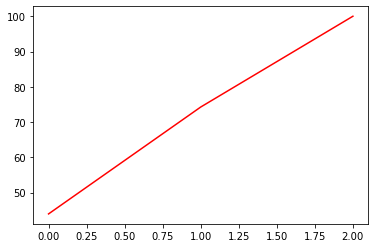

In [25]:
plt.plot(var1,color='red')

In [29]:
pca_values[:,0:4]

array([[-7.42889372e-01, -1.35859608e+00, -5.27720888e-01],
       [ 6.41741206e-01, -4.52237975e-01, -6.15872757e-01],
       [-8.37942121e-01, -2.22212552e-01,  7.19937097e-01],
       [-1.11568165e+00, -1.31345903e+00, -4.99769745e-01],
       [-1.46913532e+00, -1.95252231e-01,  1.15320535e+00],
       [-7.91110227e-01, -1.30917643e+00, -4.64753887e-01],
       [-9.76239777e-01, -1.36508712e+00, -6.30390432e-01],
       [-1.24365373e+00, -9.92492398e-01, -2.95071461e-02],
       [-5.27649141e-01, -1.73033813e+00, -1.65554317e+00],
       [ 5.96983170e-02, -1.28927884e+00, -6.07892181e-01],
       [-5.47728184e-01, -8.85573638e-01, -9.18787641e-01],
       [-3.01941499e-01, -1.40135948e+00, -6.90510748e-01],
       [-3.62687555e-01, -9.93001007e-01, -2.46622345e-01],
       [-1.02858269e+00, -1.69892628e+00, -1.01439661e+00],
       [-8.04507033e-01, -1.32898922e+00, -8.17015266e-01],
       [-9.95191803e-01, -9.69230500e-01,  6.19522396e-01],
       [-1.56955478e+00, -1.37622954e+00

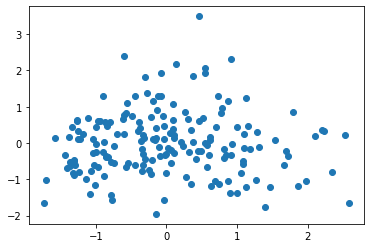

In [32]:
x=pca_values[:,1:2]
y=pca_values[:,2:4]
#z=pca_values[:,3:4]
plt.scatter(x,y)

In [38]:
finaldf=pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']),df[['Alcohol','Malic','Ash']]],axis=1)
finaldf

,pc1,pc2,pc3,Alcohol,Malic,Ash
0,-0.742889,-1.358596,-0.527721,14.23,1.71,2.43
1,0.641741,-0.452238,-0.615873,13.20,1.78,2.14
2,-0.837942,-0.222213,0.719937,13.16,2.36,2.67
3,-1.115682,-1.313459,-0.499770,14.37,1.95,2.50
4,-1.469135,-0.195252,1.153205,13.24,2.59,2.87
...,...,...,...,...,...,...
173,-2.198425,1.862339,-1.186383,13.71,5.65,2.45
174,-1.262213,0.809246,-0.403567,13.40,3.91,2.48
175,-0.819292,1.261470,-1.021720,13.27,4.28,2.26
176,-0.243491,0.061570,-0.180847,13.17,2.59,2.37


In [1]:
# Hierarchy Clustering

In [7]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


data2=df.copy()
data3=data2.iloc[:,1:4]
data3

,Alcohol,Malic,Ash
0,14.23,1.71,2.43
1,13.20,1.78,2.14
2,13.16,2.36,2.67
3,14.37,1.95,2.50
4,13.24,2.59,2.87
...,...,...,...
173,13.71,5.65,2.45
174,13.40,3.91,2.48
175,13.27,4.28,2.26
176,13.17,2.59,2.37


In [5]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [8]:
df_norm=norm_func(data3)
df_norm

,Alcohol,Malic,Ash
0,0.842105,0.191700,0.572193
1,0.571053,0.205534,0.417112
2,0.560526,0.320158,0.700535
3,0.878947,0.239130,0.609626
4,0.581579,0.365613,0.807487
...,...,...,...
173,0.705263,0.970356,0.582888
174,0.623684,0.626482,0.598930
175,0.589474,0.699605,0.481283
176,0.563158,0.365613,0.540107


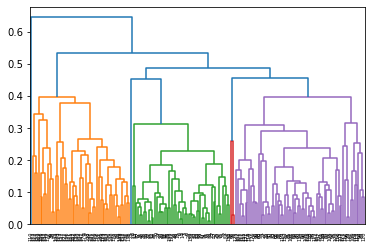

In [10]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

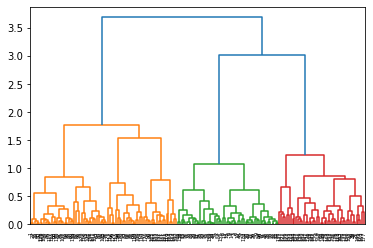

In [11]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='ward'))

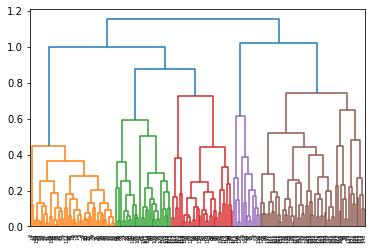

In [12]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

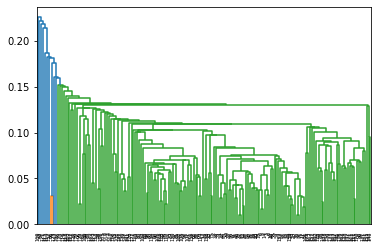

In [13]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='single'))

In [15]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='single')

In [17]:
y_hc=hc.fit_predict(df_norm)
CLusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [18]:
df_norm['h_clustersid']=hc.labels_
df_norm

,Alcohol,Malic,Ash,h_clustersid
0,0.842105,0.191700,0.572193,0
1,0.571053,0.205534,0.417112,0
2,0.560526,0.320158,0.700535,0
3,0.878947,0.239130,0.609626,0
4,0.581579,0.365613,0.807487,0
...,...,...,...,...
173,0.705263,0.970356,0.582888,0
174,0.623684,0.626482,0.598930,0
175,0.589474,0.699605,0.481283,0
176,0.563158,0.365613,0.540107,0


In [19]:
#Kmeans CLustering

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data4=df.copy()
data5=data4.iloc[:,1:4]
data5

,Alcohol,Malic,Ash
0,14.23,1.71,2.43
1,13.20,1.78,2.14
2,13.16,2.36,2.67
3,14.37,1.95,2.50
4,13.24,2.59,2.87
...,...,...,...
173,13.71,5.65,2.45
174,13.40,3.91,2.48
175,13.27,4.28,2.26
176,13.17,2.59,2.37


In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler_values=scaler.fit_transform(data5)

In [25]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler_values)
    wcss.append(kmeans.inertia_)

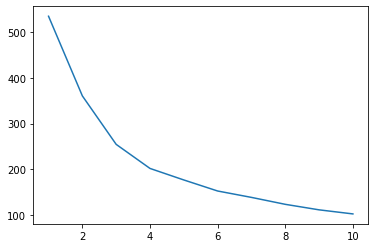

In [29]:
plt.plot(range(1,11),wcss)
plt.show()

In [40]:
cluster_new=KMeans(4,random_state=40)
cluster_new.fit(scaler_values)

KMeans(n_clusters=4, random_state=40)

In [41]:
data5['clusters_id']=cluster_new.labels_

In [44]:
cluster_new.cluster_centers_

array([[-0.80538941, -0.34928696,  1.0274043 ],
       [-0.7372901 , -0.52794624, -0.99901406],
       [ 0.24099563,  1.51776395,  0.19201785],
       [ 1.06907298, -0.47160342,  0.35461397]])

In [49]:
data5.groupby('clusters_id').agg(['mean']).reset_index()

,clusters_id,Alcohol,Malic,Ash
,,mean,mean,mean
0,0,12.348621,1.947241,2.647586
1,1,12.403750,1.748214,2.093214
2,2,13.195714,4.027143,2.419048
3,3,13.866078,1.810980,2.463529
